https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
df.describe(include = 'object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [6]:
df.isnull().sum() #количество пустых строк

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There's no missing value on the dataset

In [7]:
df.duplicated().sum()

0

There's no duplicates on the dataset

In [8]:
df['experience_level'] = df['experience_level'].replace('EN','Junior')
df['experience_level'] = df['experience_level'].replace('MI','Middle')
df['experience_level'] = df['experience_level'].replace('SE','Senior')
df['experience_level'] = df['experience_level'].replace('EX','Executive')

## Salary distribution

In [9]:
df['salary_in_TH_usd'] = df['salary_in_usd'] / 1000

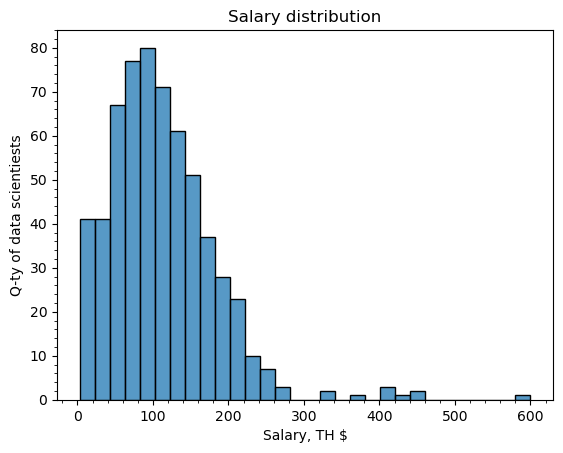

In [10]:

sns.histplot(df['salary_in_TH_usd'], bins = 30)
plt.title('Salary distribution')
plt.xlabel('Salary, TH $')
plt.ylabel('Q-ty of data scientiests');
plt.minorticks_on()

c:\Users\Nadezhda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(101.57, -0.5, 'Median: 102')

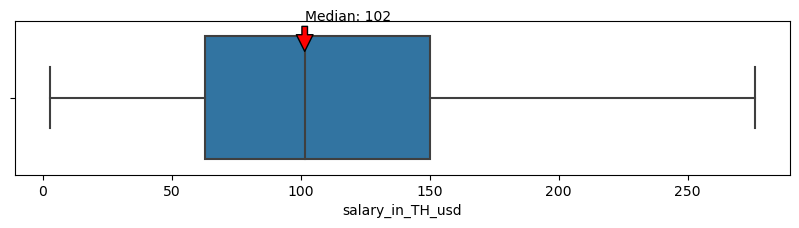

In [11]:


plt.figure(figsize=(10, 2))
sns.boxplot(df['salary_in_TH_usd'], showfliers=False)



# Добавляем значение медианы
median = np.median(df['salary_in_TH_usd'])
plt.annotate(f'Median: {median:.0f}', 
            xy=(median, -0.3), #положение подписываемой штуки
            xytext=(median, -0.5), #положение подписи  
            arrowprops=dict(facecolor='red', shrink=0))#формат стрелочки;

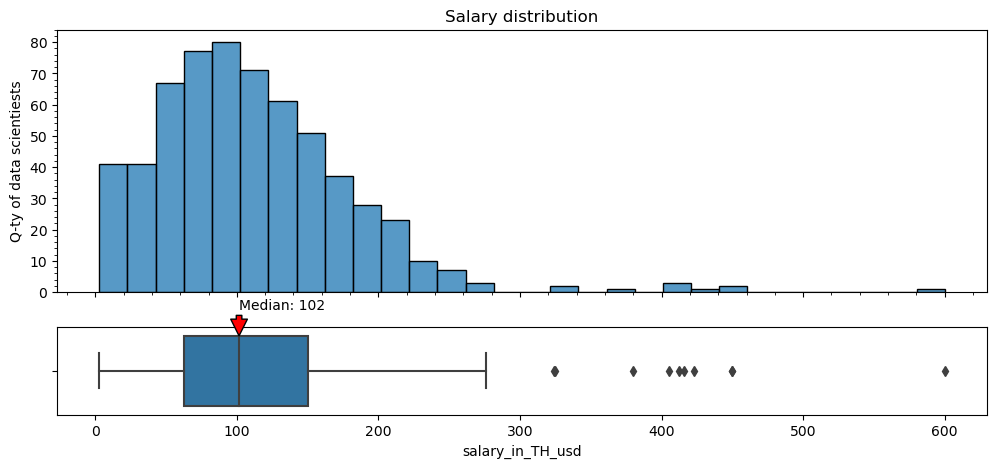

In [12]:
# создаем subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 2), gridspec_kw={'height_ratios': [3, 1]})

# задаем гистограмму в первом subplot
sns.histplot(ax=ax[0], data=df, x='salary_in_TH_usd', bins=30)
ax[0].set(title='Salary distribution', ylabel='Q-ty of data scientiests', xlabel='')
ax[0].set_xticklabels([])  # скрываем подписи на оси абсцисс
ax[0].minorticks_on()

# задаем боксплот во втором subplot
sns.boxplot(ax=ax[1], data=df, x='salary_in_TH_usd', showfliers= True)

# Добавляем значение медианы
median = np.median(df['salary_in_TH_usd'])
plt.annotate(f'Median: {median:.0f}', 
            xy=(median, -0.4), #положение подписываемой штуки
            xytext=(median, -0.7), #положение подписи  
            arrowprops=dict(facecolor='red', shrink=0))#формат стрелочки;
fig.set_size_inches(12, 5)

# отображаем графики
plt.show();

## experience_level

In [13]:
counts = df['experience_level'].value_counts()
counts

Senior       280
Middle       213
Junior        88
Executive     26
Name: experience_level, dtype: int64

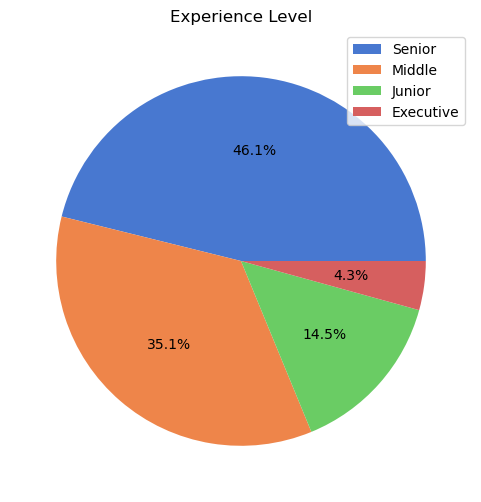

In [14]:
order = ['Junior', 'Middle', 'Senior','Executive']
plt.figure(figsize= (6, 6))
colors = sns.color_palette('muted')[ 0:5 ] #define Seaborn color palette to use
plt.pie(counts, autopct='%1.1f%%', colors = colors)
plt.title('Experience Level')
plt.legend(counts.index, loc='upper right', fontsize=10);

In [15]:
plt.figure(figsize= (6, 6))
fig=px.pie(values=counts.values,
          names=counts.index,
          color_discrete_sequence=px.colors.sequential.Agsunset,   # https://media.geeksforgeeks.org/wp-content/uploads/20220220154706/newplot.png
          title= 'Experience level distribution'
        #   ,template='plotly_dark'
          )
fig.update_traces(textinfo='label+percent', textfont_size=13
                   )

fig.data[0].marker.line.width = 2
# fig.data[0].marker.line.color='gray'
fig.show();

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Experience Level')

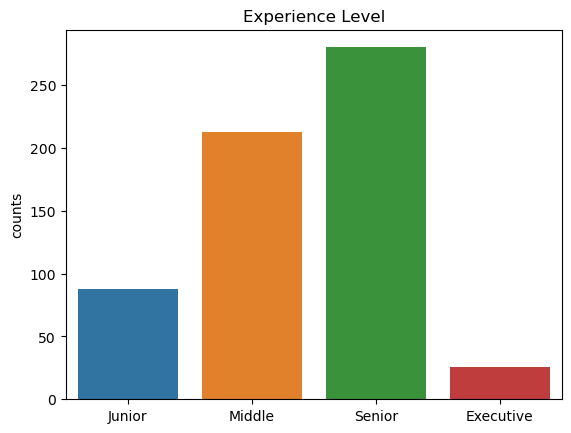

In [16]:
order = ['Junior', 'Middle', 'Senior','Executive']
# Sorting indices so it's easier to read 
counts.sort_index(inplace=True)

sns.barplot(x = counts.index, y = counts, order=order)
plt.ylabel('counts')


plt.title('Experience Level')


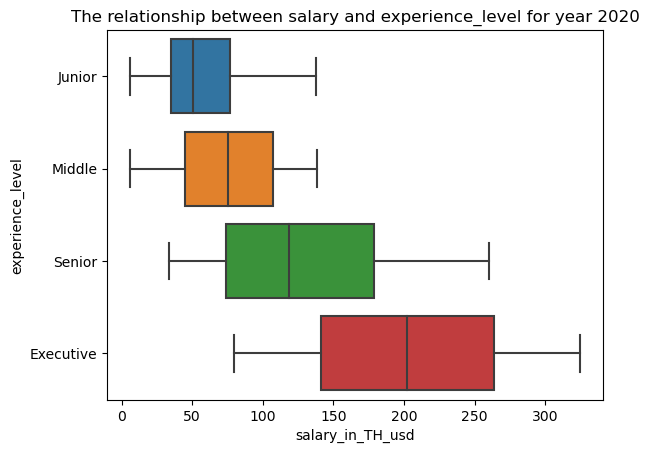

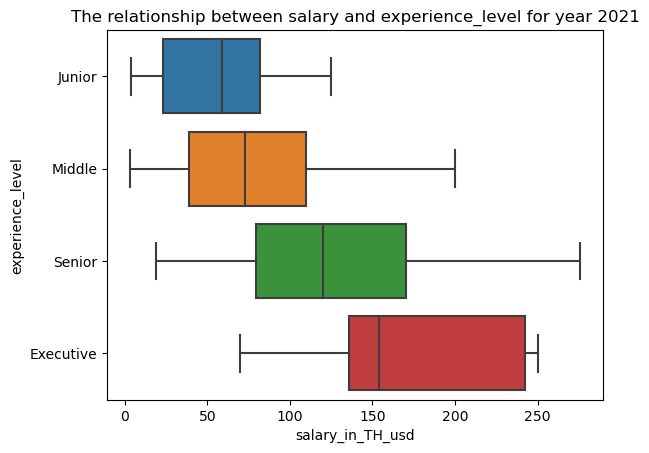

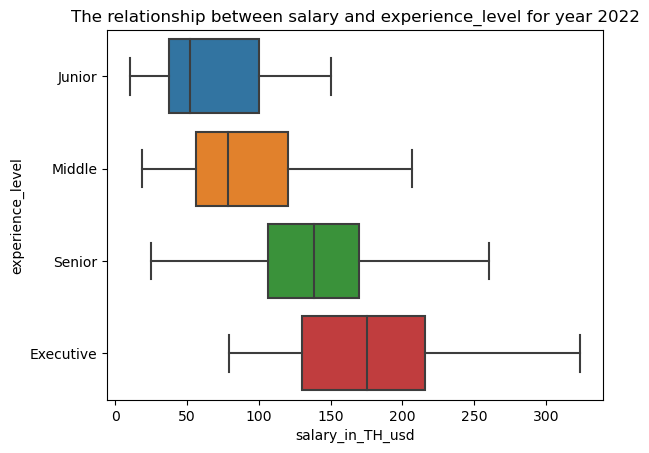

In [17]:


years = df['work_year'].unique()    # получаем уникальные года из столбца work_year
order = ['Junior', 'Middle', 'Senior', 'Executive']

for year in years:
    data = df[df['work_year'] == year]    # выбираем данные только для определенного года
    sns.boxplot(x=data['salary_in_TH_usd'], y=data['experience_level'], order=order, showfliers=False)
    plt.title('The relationship between salary and experience_level for year {}'.format(year))
    plt.show()


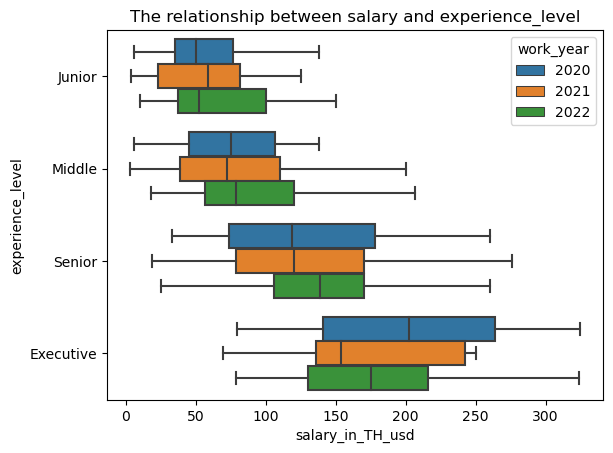

In [18]:
order = ['Junior', 'Middle', 'Senior','Executive']
sns.boxplot(x=df['salary_in_TH_usd'],
             y=df['experience_level'], 
             order=order,
             hue=df['work_year'],
             showfliers = False)   
plt.title('The relationship between salary and experience_level');

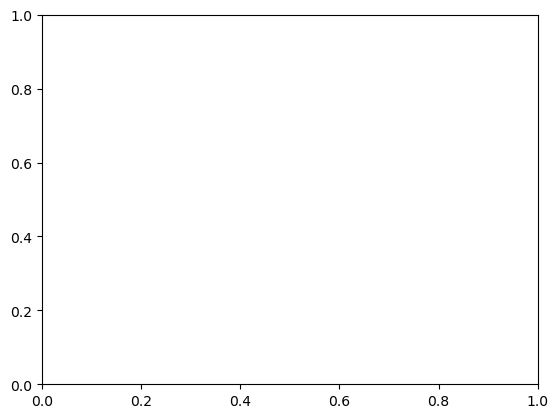

In [19]:
years = df['work_year'].unique()
order = ['Junior', 'Middle', 'Senior', 'Executive']

fig, ax = plt.subplots()

def animate(year):
    data = df[df['work_year'] == year]
    sns.boxplot(ax=ax, x=data['salary_in_TH_usd'], y=data['experience_level'], order=order, showfliers=False)
    ax.set_title('The relationship between salary and experience_level for year {}'.format(year))
    display(fig)
ani = animation.FuncAnimation(fig, animate, frames=years, repeat=True)
# ax.autoscale()
plt.show()
fig.savefig("test.png")



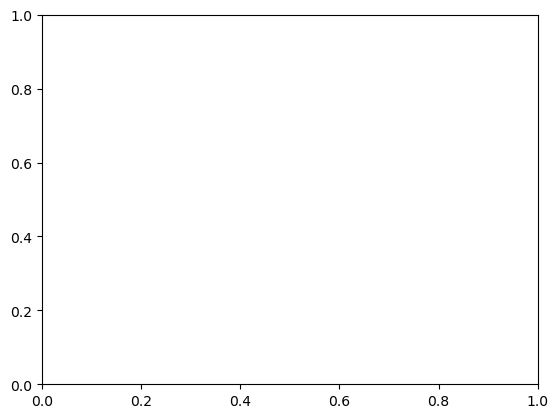

In [20]:
years = df['work_year'].unique()
order = ['Junior', 'Middle', 'Senior', 'Executive']

fig, ax = plt.subplots()

def animate(year):
    data = df[df['work_year'] == year]
    sns.boxplot(ax=ax, x=data['salary_in_TH_usd'], y=data['experience_level'], order=order, showfliers=False)
    ax.set_title('The relationship between salary and experience_level for year {}'.format(year))
    display(fig)
ani = animation.FuncAnimation(fig, animate, frames=years, repeat=True)
# ax.autoscale()
plt.show()
fig.savefig("test.png")


## employment_type

In [21]:
df['employment_type'] = df['employment_type'].replace('PT','Part-time')
df['employment_type'] = df['employment_type'].replace('FT','Full-time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

In [22]:
counts = df['employment_type'].value_counts()

Text(0.5, 1.0, 'employment type')

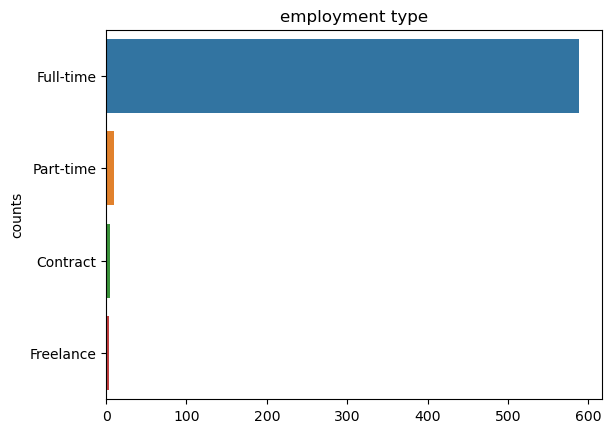

In [23]:
# Sorting indices so it's easier to read 
counts.sort_values(inplace=True, ascending=False)

sns.barplot(y=counts.index, x=counts.values, orient='h')
plt.ylabel('counts')


plt.title('employment type')


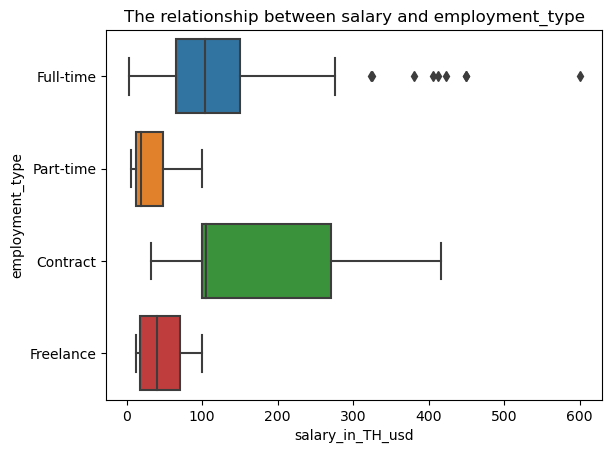

In [24]:
order = counts.index
sns.boxplot(x=df['salary_in_TH_usd'], y=df['employment_type'], showfliers = True, order = order)   # bedrooms vs price boxplot  
plt.title('The relationship between salary and employment_type');

## job_title

In [25]:
counts = df['job_title'].value_counts()
counts

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

Text(0.5, 1.0, 'job_title')

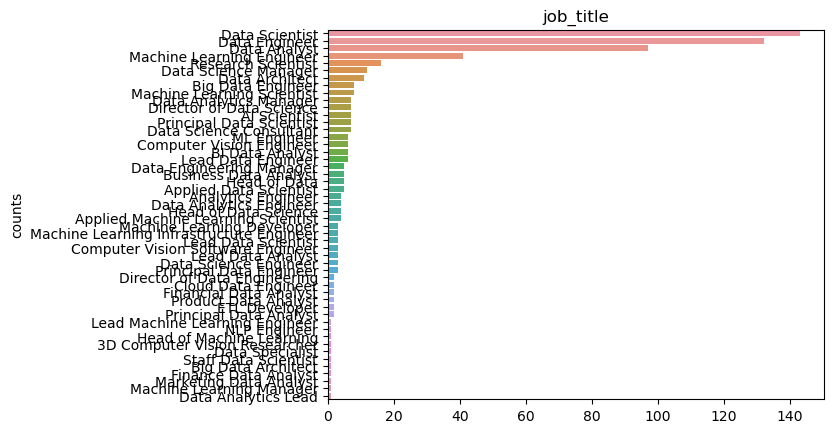

In [26]:
# Sorting indices so it's easier to read 
counts.sort_values(inplace=True, ascending=False)

sns.barplot(y=counts.index, x=counts.values, orient='h')
plt.ylabel('counts')


plt.title('job_title')


c:\Users\Nadezhda\anaconda3\lib\site-packages\matplotlib\animation.py:887: UserWarning:

Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.



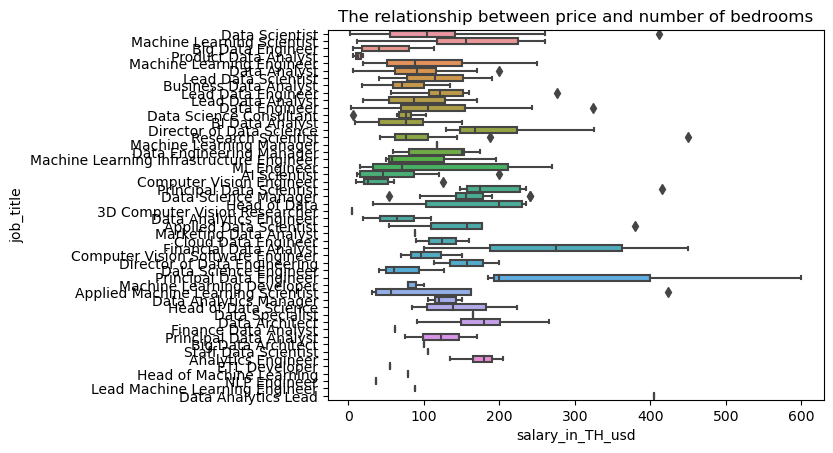

In [27]:
 # Построим boxplot, чтобы увидеть, как цены разли**3.1. Взаимосвязь цены и количество ванных комнат (0,5)**чных квартир/домов связаны c bedrooms, bathrooms, sqft_living, floors.  
sns.boxplot(x=df['salary_in_TH_usd'], y=df['job_title'], showfliers = True)   # bedrooms vs price boxplot  
plt.title('The relationship between price and number of bedrooms');

In [28]:
df['employment_type'].value_counts()

Full-time    588
Part-time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

## Regions

In [29]:
ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

In [30]:
df['employee_residence_full'] = df['employee_residence'].map(ISO3166)
df['company_location_full'] = df['company_location'].map(ISO3166)
# The "map()" function is used here to apply the ISO3166 dictionary to each value in the 
# "company_location" column, replacing the string country name with its ISO3166 code.

In [31]:
result = df.groupby('company_location_full').agg(
        {'salary_in_TH_usd':['mean', 'median'], 
        'company_location_full': 'count'})
result = result.round(2) 

# Избавимся от двухэтажных индексов
# https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result = result.reset_index()
result


,company_location_full,salary_in_TH_usd_mean,salary_in_TH_usd_median,company_location_full_count
0,Algeria,100.00,100.00,1
1,American Samoa,18.05,18.05,1
2,Australia,108.04,87.42,3
3,Austria,72.92,69.49,4
4,Belgium,85.70,85.70,2
5,Brazil,18.60,18.91,3
6,Canada,99.82,81.90,30
7,Chile,40.04,40.04,1
8,China,71.67,71.67,2
9,Colombia,21.84,21.84,1


In [34]:
# fig = px.choropleth(locations=result['company_location_full'],
#                     color=result['salary_in_TH_usd_median'],
#                     color_continuous_scale=px.colors.sequential.solar,
#                     template='plotly_dark',
#                     title = 'Average Salary by Company Location')
# fig.update_layout(font = dict(size=17,family="Franklin Gothic"))
# fig.show();

fig = px.choropleth(result,
                    locations='company_location_full',
                    locationmode='country names', # update
                    color='salary_in_TH_usd_median',
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = 'Average Salary by Company Location')
fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()



## Remote ratio

In [33]:
df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)

df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)